## 📂 Mount Google Drive

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## 📦 Extract Dataset

In [2]:
# Unzip Wang.zip into /content/wang_dataset
import zipfile  # 📦 Import necessary libraries
import os  # 📦 Import necessary libraries

zip_path = "/content/drive/MyDrive/Dataset/Wang.zip"  # 🔁 Change if needed  # ⚙️ Variable assignment
extract_path = "/content/drive/MyDrive/Dataset/wang_dataset"  # ⚙️ Variable assignment

# Extract only if not already done
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

print(f"✅ Extracted Wang dataset to: {extract_path}")


✅ Extracted Wang dataset to: /content/drive/MyDrive/Dataset/wang_dataset


## 🖼 Collect Image Paths

In [3]:
from glob import glob

# Collect all .jpg image paths from extracted Wang dataset
image_paths = glob(os.path.join(extract_path, "*.jpg"))  # ⚙️ Variable assignment
print(f"Found {len(image_paths)} images in the WANG dataset.")


Found 0 images in the WANG dataset.


## 🗂 Set Dataset Path

In [4]:
# 🔁 Path to your extracted image folder
DATASET_PATH = "/content/drive/MyDrive/Dataset/wang_dataset/Wang"  # ⚙️ Variable assignment
CROP_SAVE_PATH = "/content/outputs/crops"  # ⚙️ Variable assignment
QUERY_CROP_PATH = "/content/outputs/query_crops"  # ⚙️ Variable assignment

# Create output folders
import os  # 📦 Import necessary libraries
os.makedirs(CROP_SAVE_PATH, exist_ok=True)  # 📁 Create directory if it doesn't exist
os.makedirs(QUERY_CROP_PATH, exist_ok=True)  # 📁 Create directory if it doesn't exist


## 📚 Import Libraries

In [5]:
from PIL import Image, ImageOps, ImageFilter
import numpy as np  # 📦 Import necessary libraries

def preprocess_image(image_path, target_size=(512, 512), apply_filters=True):  # ⚙️ Variable assignment
    """
    Preprocess image:
    - Convert to RGB
    - Resize to fixed size
    - Optionally apply smoothing or sharpening
    """
    try:
        img = Image.open(image_path)  # ⚙️ Variable assignment

        # Convert to RGB if not already
        if img.mode != 'RGB':  # ⚙️ Variable assignment
            img = img.convert('RGB')  # ⚙️ Variable assignment

        # Resize while maintaining aspect ratio and padding
        img = ImageOps.pad(img, target_size, method=Image.BICUBIC)  # ⚙️ Variable assignment

        # Optional filters
        if apply_filters:
            img = img.filter(ImageFilter.SHARPEN)  # ⚙️ Variable assignment
            img = img.filter(ImageFilter.SMOOTH)  # ⚙️ Variable assignment

        return img
    except Exception as e:
        print(f"Error preprocessing {image_path}: {e}")
        return None


## 🧼 Define Preprocessing Functions

In [6]:
def crop_objects_from_image(image_path, save_folder):  # 🔧 Define function
    os.makedirs(save_folder, exist_ok=True)  # 📁 Create directory if it doesn't exist

    # 🔁 Preprocess first
    image = preprocess_image(image_path, target_size=(512, 512))  # ⚙️ Variable assignment
    if image is None:
        return []

    results = yolo_model(image)  # ⚙️ Variable assignment

    crops = []  # ⚙️ Variable assignment
    for i, box in enumerate(results[0].boxes.xyxy.cpu().numpy()):
        x1, y1, x2, y2 = map(int, box)  # ⚙️ Variable assignment
        cropped = image.crop((x1, y1, x2, y2))  # ⚙️ Variable assignment
        crop_path = os.path.join(save_folder, f"{os.path.basename(image_path)}_obj{i}.jpg")  # ⚙️ Variable assignment
        cropped.save(crop_path)
        crops.append((crop_path, cropped))
    return crops


## 📁 Create Preprocessed Image Directory

In [7]:
PREPROCESSED_DIR = "/content/preprocessed_wang"  # ⚙️ Variable assignment
os.makedirs(PREPROCESSED_DIR, exist_ok=True)  # 📁 Create directory if it doesn't exist

for img_path in image_paths:
    img = preprocess_image(img_path)  # ⚙️ Variable assignment
    if img:
        out_path = os.path.join(PREPROCESSED_DIR, os.path.basename(img_path))  # ⚙️ Variable assignment
        img.save(out_path)

# 🔁 Replace original paths with preprocessed paths for rest of pipeline
image_paths = glob(os.path.join(PREPROCESSED_DIR, "*.jpg"))  # ⚙️ Variable assignment


## ⚙️ Install Required Libraries

In [8]:
!pip install -q diffusers transformers accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.4 MB/s eta 0:00:00


## 🎨 Load Stable Diffusion Model

In [9]:
from diffusers import StableDiffusionPipeline
import torch  # 📦 Import necessary libraries

device = "cuda" if torch.cuda.is_available() else "cpu"  # ⚙️ Variable assignment

# Load pre-trained stable diffusion model
pipe = StableDiffusionPipeline.from_pretrained(  # ⚙️ Variable assignment
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32  # ⚙️ Variable assignment
)
pipe = pipe.to(device)  # ⚙️ Variable assignment


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## 🔍 Define Object Detection (YOLO) Function

In [10]:
def get_yolo_object_labels(image_path):  # 🔧 Define function
    results = yolo_model(image_path)  # ⚙️ Variable assignment
    class_ids = results[0].boxes.cls.cpu().numpy().astype(int)  # ⚙️ Variable assignment
    class_names = [yolo_model.names[c] for c in class_ids]  # ⚙️ Variable assignment
    return list(set(class_names))  # return unique labels


In [11]:
from PIL import Image
from IPython.display import display

def generate_similar_images_from_yolo(image_path, num_images=3):  # ⚙️ Variable assignment
    # Get object labels using YOLO
    detected_classes = get_yolo_object_labels(image_path)  # ⚙️ Variable assignment
    print("Detected object classes:", detected_classes)

    # Generate prompts for each class and generate images
    for obj_class in detected_classes:
        prompt = f"a photo of a {obj_class}"  # ⚙️ Variable assignment
        print(f"\nGenerating images for: '{prompt}'")

        images = pipe(prompt, num_images_per_prompt=num_images, guidance_scale=7.5).images  # ⚙️ Variable assignment
        for i, img in enumerate(images):
            save_path = f"/content/generated_{obj_class}_{i}.png"  # ⚙️ Variable assignment
            img.save(save_path)
            display(img)


In [12]:
DATASET_PATH = "/content/drive/MyDrive/Dataset/wang_dataset/Wang"  # ⚙️ Variable assignment


In [13]:
import os  # 📦 Import necessary libraries

# List some files in the dataset folder
print("Files found in dataset folder:")
print(os.listdir(DATASET_PATH)[:10])


Files found in dataset folder:
['9015.jpg', '9016.jpg', '9017.jpg', '9018.jpg', '9019.jpg', '902.jpg', '9020.jpg', '9021.jpg', '9022.jpg', '9023.jpg']


In [14]:
from glob import glob

# Match .jpg, .jpeg, .JPG, .png
image_paths = []  # ⚙️ Variable assignment
for ext in ['*.jpg', '*.jpeg', '*.JPG', '*.png']:
    image_paths.extend(glob(os.path.join(DATASET_PATH, ext)))

print(f"✅ Found {len(image_paths)} images.")


✅ Found 9908 images.


In [15]:
# ✅ Install Ultralytics YOLOv8
!pip install -q ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.1 MB/s eta 0:00:00


In [16]:
# ✅ Load YOLOv8 after installing
from ultralytics import YOLO

yolo_model = YOLO('yolov8m.pt')  # or 'yolov8n.pt' if you want a faster, lighter model  # ⚙️ Variable assignment


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 49.7M/49.7M [00:00<00:00, 235MB/s]



image 1/1 /content/drive/MyDrive/Dataset/wang_dataset/Wang/9015.jpg: 480x640 2 persons, 176.9ms
Speed: 23.8ms preprocess, 176.9ms inference, 501.0ms postprocess per image at shape (1, 3, 480, 640)
Detected object classes: ['person']

Generating images for: 'a photo of a person'


  0%|          | 0/50 [00:00<?, ?it/s]

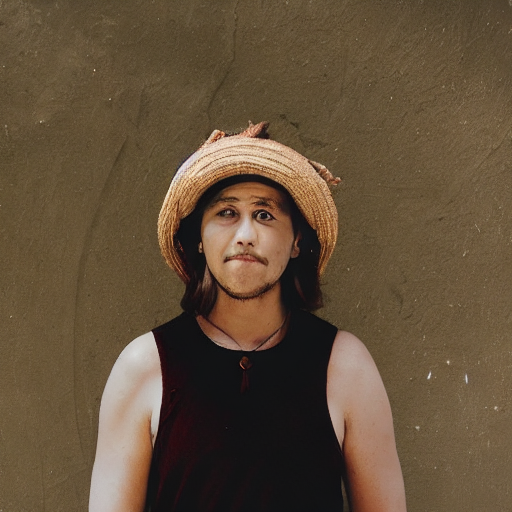

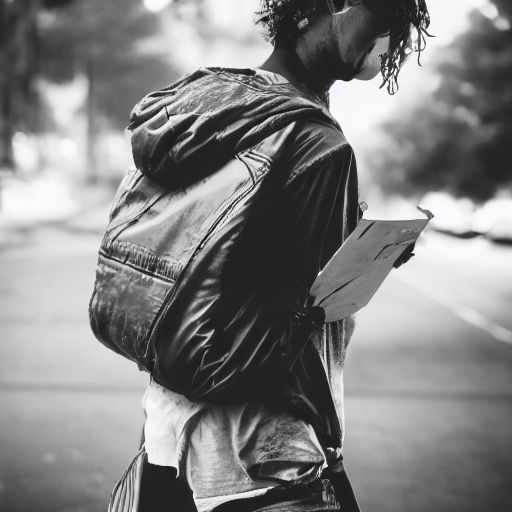

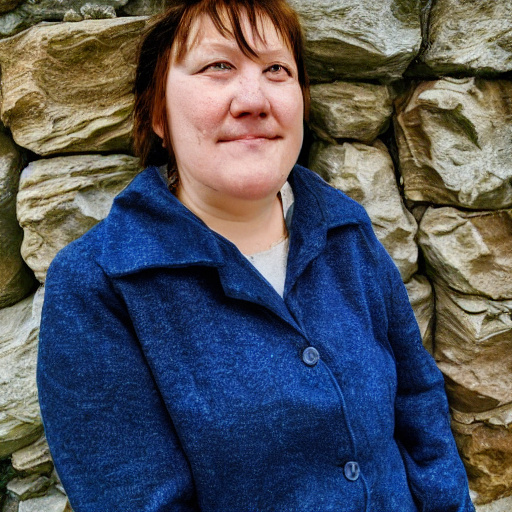

In [17]:
query_image = image_paths[0]  # ⚙️ Variable assignment
generate_similar_images_from_yolo(query_image, num_images=3)  # ⚙️ Variable assignment


In [18]:
# Show all 80 class names YOLOv8 is trained to detect
for i, name in yolo_model.names.items():
    print(f"{i}: {name}")



0: person
1: bicycle
2: car
3: motorcycle
4: airplane
5: bus
6: train
7: truck
8: boat
9: traffic light
10: fire hydrant
11: stop sign
12: parking meter
13: bench
14: bird
15: cat
16: dog
17: horse
18: sheep
19: cow
20: elephant
21: bear
22: zebra
23: giraffe
24: backpack
25: umbrella
26: handbag
27: tie
28: suitcase
29: frisbee
30: skis
31: snowboard
32: sports ball
33: kite
34: baseball bat
35: baseball glove
36: skateboard
37: surfboard
38: tennis racket
39: bottle
40: wine glass
41: cup
42: fork
43: knife
44: spoon
45: bowl
46: banana
47: apple
48: sandwich
49: orange
50: broccoli
51: carrot
52: hot dog
53: pizza
54: donut
55: cake
56: chair
57: couch
58: potted plant
59: bed
60: dining table
61: toilet
62: tv
63: laptop
64: mouse
65: remote
66: keyboard
67: cell phone
68: microwave
69: oven
70: toaster
71: sink
72: refrigerator
73: book
74: clock
75: vase
76: scissors
77: teddy bear
78: hair drier
79: toothbrush


In [19]:
!pip install -q ftfy regex tqdm torchvision clip
!pip install -q diffusers transformers accelerate


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.8 MB/s eta 0:00:00


In [ ]:
# !pip uninstall -y clip



Found existing installation: clip 1.0
Uninstalling clip-1.0:
  Successfully uninstalled clip-1.0


In [20]:
 !pip install git+https://github.com/openai/CLIP.git



  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-1s52n3d_
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-1s52n3d_
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=dc5d17e3798a1edb5d182f9009f5a523724b32d529652bad2ce5e7b2f3f4ec8c
  Stored in directory: /tmp/pip-ephem-wheel-cache-4zkvzu7h/wheels/3f/7c/a4/9b490845988bf7a4db33674d52f709f088f64392063872eb9a
Successfully built clip
  Attempting uninstall: clip
    Found existing installation: clip 0.2.0
    Uninstalling clip-0.2.0:
      Successfully uninstalled clip-0.2.0


In [21]:
import clip  # 📦 Import necessary libraries
import torch  # 📦 Import necessary libraries
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"  # ⚙️ Variable assignment
clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)  # ⚙️ Variable assignment


100%|███████████████████████████████████████| 338M/338M [00:08<00:00, 43.3MiB/s]


In [22]:
# Candidate prompts based on WANG dataset categories
candidate_prompts = [  # ⚙️ Variable assignment
    "a photo of a flower",
    "a photo of a dinosaur",
    "a photo of a beach",
    "a photo of a mountain",
    "a photo of a building",
    "a photo of an elephant",
    "a photo of a horse",
    "a photo of African people",
    "a photo of food",
    "a photo of a bus"
]


In [23]:
def generate_clip_prompt(image_path, prompts=candidate_prompts):  # ⚙️ Variable assignment
    image = clip_preprocess(Image.open(image_path)).unsqueeze(0).to(device)  # ⚙️ Variable assignment
    text = clip.tokenize(prompts).to(device)  # ⚙️ Variable assignment

    with torch.no_grad():
        image_features = clip_model.encode_image(image)  # ⚙️ Variable assignment
        text_features = clip_model.encode_text(text)  # ⚙️ Variable assignment

        # Compute similarity
        similarity = torch.nn.functional.cosine_similarity(image_features, text_features)  # ⚙️ Variable assignment
        best_match_index = similarity.argmax().item()  # ⚙️ Variable assignment
        return prompts[best_match_index]


In [24]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(  # ⚙️ Variable assignment
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32  # ⚙️ Variable assignment
)
pipe = pipe.to(device)  # ⚙️ Variable assignment


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [25]:
from IPython.display import display

def generate_images_from_clip(image_path, num_images=3):  # ⚙️ Variable assignment
    # Step 1: Generate prompt
    prompt = generate_clip_prompt(image_path)  # ⚙️ Variable assignment
    print(f"📝 CLIP Prompt: {prompt}")

    # Step 2: Generate images
    images = pipe(prompt, num_images_per_prompt=num_images, guidance_scale=7.5).images  # ⚙️ Variable assignment

    # Step 3: Save + display
    for i, img in enumerate(images):
        filename = f"/content/generated_clip_{i}.png"  # ⚙️ Variable assignment
        img.save(filename)
        display(img)


In [26]:
# Choose an image from your dataset
from glob import glob
image_paths = glob("/content/drive/MyDrive/Dataset/wang_dataset/Wang/*.jpg")  # Update if needed  # ⚙️ Variable assignment

# Run generation
query_image = image_paths[10]  # ⚙️ Variable assignment
generate_images_from_clip(query_image, num_images=3)  # ⚙️ Variable assignment


Output hidden; open in https://colab.research.google.com to view.

In [27]:
# Install dependencies
!pip install -q git+https://github.com/openai/CLIP.git
!pip install -q faiss-cpu diffusers transformers accelerate gradio


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 28.5 MB/s eta 0:00:00


In [28]:
# Load CLIP
import clip  # 📦 Import necessary libraries
import torch  # 📦 Import necessary libraries
from PIL import Image
import os  # 📦 Import necessary libraries
import numpy as np  # 📦 Import necessary libraries

device = "cuda" if torch.cuda.is_available() else "cpu"  # ⚙️ Variable assignment
clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)  # ⚙️ Variable assignment

# Load Stable Diffusion
from diffusers import StableDiffusionPipeline
sd_pipe = StableDiffusionPipeline.from_pretrained(  # ⚙️ Variable assignment
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32  # ⚙️ Variable assignment
).to(device)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [32]:
from glob import glob
import faiss  # 📦 Import necessary libraries

# Load dataset image paths
dataset_path = "/content/drive/MyDrive/Dataset/wang_dataset/Wang"  # ⚙️ Variable assignment
image_paths = glob(os.path.join(dataset_path, "*.jpg"))  # ⚙️ Variable assignment

# Preprocess + embed
all_embeddings = []  # ⚙️ Variable assignment
valid_paths = []  # ⚙️ Variable assignment

for path in image_paths:
    try:
        img = clip_preprocess(Image.open(path).convert("RGB")).unsqueeze(0).to(device)  # ⚙️ Variable assignment
        with torch.no_grad():
            emb = clip_model.encode_image(img).cpu().numpy()[0]  # ⚙️ Variable assignment
        all_embeddings.append(emb)
        valid_paths.append(path)
    except:
        continue

# Build FAISS index
embeddings_np = np.array(all_embeddings).astype("float32")  # ⚙️ Variable assignment
faiss_index = faiss.IndexFlatL2(embeddings_np.shape[1])  # ⚙️ Variable assignment
faiss_index.add(embeddings_np)


In [29]:
def generate_from_text(prompt, num_images=3):  # ⚙️ Variable assignment
    images = sd_pipe(prompt, num_images_per_prompt=num_images, guidance_scale=7.5).images  # ⚙️ Variable assignment
    return images


In [30]:
def retrieve_similar_images(uploaded_image, k=5):  # ⚙️ Variable assignment
    # Convert uploaded PIL image
    img_tensor = clip_preprocess(uploaded_image).unsqueeze(0).to(device)  # ⚙️ Variable assignment
    with torch.no_grad():
        query_embedding = clip_model.encode_image(img_tensor).cpu().numpy().astype("float32")  # ⚙️ Variable assignment

    D, I = faiss_index.search(query_embedding, k)  # ⚙️ Variable assignment
    return [valid_paths[i] for i in I[0]]  # Return file paths of matches


  0%|          | 0/50 [00:00<?, ?it/s]

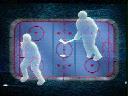

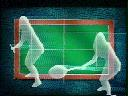

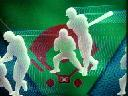

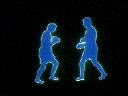

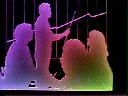

In [34]:
# Example usage:
generated = generate_from_text("a photo of a flower")  # ⚙️ Variable assignment
generated[0].show()

query_img = Image.open(image_paths[0])  # ⚙️ Variable assignment
similar = retrieve_similar_images(query_img)  # ⚙️ Variable assignment

from IPython.display import display
for sim in similar:
    display(Image.open(sim))


In [37]:
# TEXT to IMAGE GENERATION (with improved prompt control)
from PIL import Image
from IPython.display import display

def generate_from_text(prompt="a photo of a person", num_images=3):  # ⚙️ Variable assignment
    print(f"🔤 Prompt: {prompt}")
    output = sd_pipe(prompt,  # ⚙️ Variable assignment
                     num_images_per_prompt=num_images,  # ⚙️ Variable assignment
                     guidance_scale=8.5,  # ⚙️ Variable assignment
                     num_inference_steps=50)  # ⚙️ Variable assignment
    for i, img in enumerate(output.images):
        display(img)


🔤 Prompt:  cat


  0%|          | 0/50 [00:00<?, ?it/s]

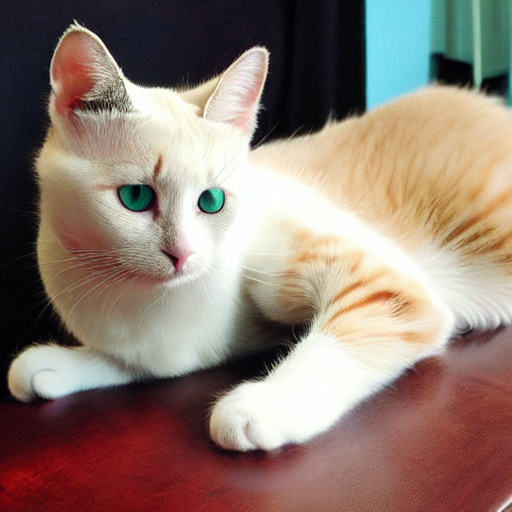

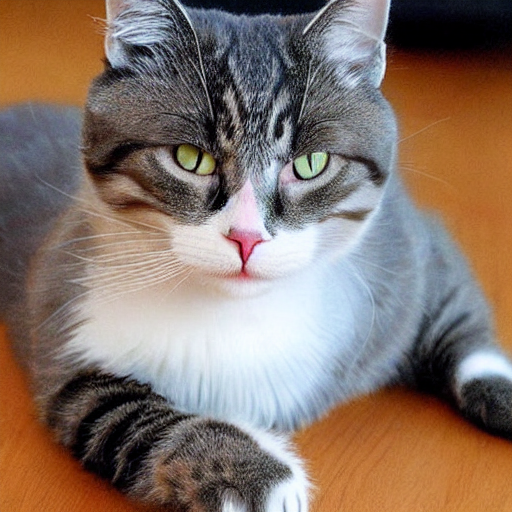

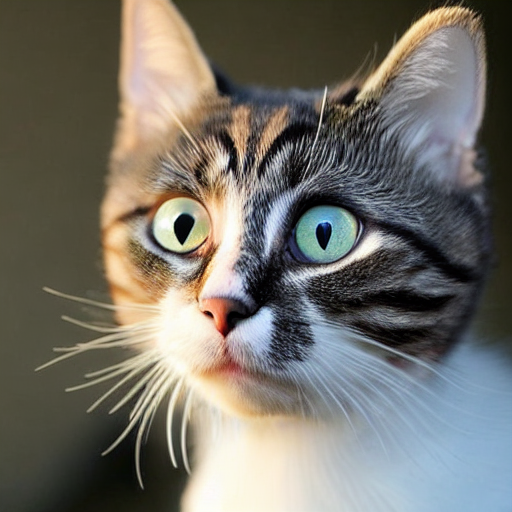

In [43]:
generate_from_text(" cat", num_images=3)  # ⚙️ Variable assignment


In [44]:
# IMAGE to IMAGE RETRIEVAL
def retrieve_similar_images(uploaded_image, k=5):  # ⚙️ Variable assignment
    img_tensor = clip_preprocess(uploaded_image).unsqueeze(0).to(device)  # ⚙️ Variable assignment
    with torch.no_grad():
        query_embedding = clip_model.encode_image(img_tensor).cpu().numpy().astype("float32")  # ⚙️ Variable assignment

    D, I = faiss_index.search(query_embedding, k)  # ⚙️ Variable assignment

    print("🔁 Top similar images:")
    for i in I[0]:
        display(Image.open(valid_paths[i]))


🔁 Top similar images:


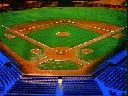

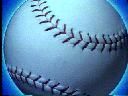

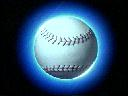

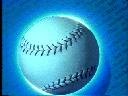

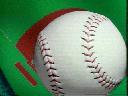

In [45]:
img = Image.open(image_paths[10])  # Try with a known beach/mountain/bus/etc  # ⚙️ Variable assignment
retrieve_similar_images(img, k=5)  # ⚙️ Variable assignment


In [47]:
import os  # 📦 Import necessary libraries

def get_label_from_path(path):  # 🔧 Define function
    return os.path.basename(os.path.dirname(path))

# Build ground truth list
true_labels = [get_label_from_path(p) for p in valid_paths]  # ⚙️ Variable assignment
label_to_index = {label: i for i, label in enumerate(sorted(set(true_labels)))}  # ⚙️ Variable assignment
index_to_label = {v: k for k, v in label_to_index.items()}  # ⚙️ Variable assignment

# Encode labels as ints for metrics
true_labels_idx = [label_to_index[label] for label in true_labels]  # ⚙️ Variable assignment


In [48]:
from collections import Counter

def predict_label(query_img, k=5):  # ⚙️ Variable assignment
    similar_paths = retrieve_similar_images(query_img, k)  # ⚙️ Variable assignment
    predicted_labels = [get_label_from_path(p) for p in similar_paths]  # ⚙️ Variable assignment
    most_common_label = Counter(predicted_labels).most_common(1)[0][0]  # ⚙️ Variable assignment
    return label_to_index[most_common_label]


In [49]:
def retrieve_similar_images(uploaded_image, k=5):  # ⚙️ Variable assignment
    img_tensor = clip_preprocess(uploaded_image).unsqueeze(0).to(device)  # ⚙️ Variable assignment
    with torch.no_grad():
        query_embedding = clip_model.encode_image(img_tensor).cpu().numpy().astype("float32")  # ⚙️ Variable assignment

    D, I = faiss_index.search(query_embedding, k)  # ⚙️ Variable assignment

    # ✅ RETURN list of image paths for use in predictions
    return [valid_paths[i] for i in I[0]]


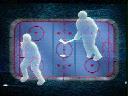

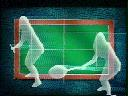

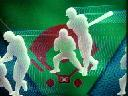

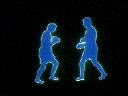

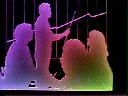

In [50]:
# Optional display
for sim_path in retrieve_similar_images(query_img):
    display(Image.open(sim_path))


In [51]:
predicted_labels_idx = []  # ⚙️ Variable assignment
query_labels_idx = []  # ⚙️ Variable assignment

for i, path in enumerate(valid_paths):
    img = Image.open(path).convert("RGB")  # ⚙️ Variable assignment
    pred = predict_label(img, k=5)  # ⚙️ Variable assignment
    predicted_labels_idx.append(pred)
    query_labels_idx.append(true_labels_idx[i])


In [53]:
# Categories based on WANG class order
wang_categories = [  # ⚙️ Variable assignment
    "african", "beach", "building", "bus", "dinosaur",
    "elephant", "flower", "horse", "mountain", "food"
]

# Label from file index
def get_label_from_path(path):  # 🔧 Define function
    index = int(os.path.splitext(os.path.basename(path))[0])  # ⚙️ Variable assignment
    class_id = index // 100  # ⚙️ Variable assignment
    return wang_categories[class_id]

# Build label mappings
true_labels = [get_label_from_path(p) for p in valid_paths]  # ⚙️ Variable assignment
label_to_index = {label: i for i, label in enumerate(wang_categories)}  # ⚙️ Variable assignment
index_to_label = {i: label for label, i in label_to_index.items()}  # ⚙️ Variable assignment
true_labels_idx = [label_to_index[label] for label in true_labels]  # ⚙️ Variable assignment


IndexError: list index out of range

In [54]:
import numpy as np  # 📦 Import necessary libraries
import faiss  # 📦 Import necessary libraries

all_embeddings = []  # ⚙️ Variable assignment

for path in valid_paths:
    try:
        img = clip_preprocess(Image.open(path).convert("RGB")).unsqueeze(0).to(device)  # ⚙️ Variable assignment
        with torch.no_grad():
            emb = clip_model.encode_image(img).cpu().numpy()[0]  # ⚙️ Variable assignment
        all_embeddings.append(emb)
    except:
        continue

embeddings_np = np.array(all_embeddings).astype("float32")  # ⚙️ Variable assignment
faiss_index = faiss.IndexFlatL2(embeddings_np.shape[1])  # ⚙️ Variable assignment
faiss_index.add(embeddings_np)

print(f"✅ Rebuilt FAISS index with {len(valid_paths)} WANG images.")


✅ Rebuilt FAISS index with 9908 WANG images.


In [55]:
predicted_labels_idx = []  # ⚙️ Variable assignment
query_labels_idx = []  # ⚙️ Variable assignment

for i, path in enumerate(valid_paths):
    img = Image.open(path).convert("RGB")  # ⚙️ Variable assignment
    pred = predict_label(img, k=5)  # ⚙️ Variable assignment
    predicted_labels_idx.append(pred)
    query_labels_idx.append(true_labels_idx[i])


IndexError: list index out of range

In [56]:
from collections import Counter
from PIL import Image

# Predict label based on majority of top-k retrieved images
def predict_label(query_img, k=5):  # ⚙️ Variable assignment
    similar_paths = retrieve_similar_images(query_img, k)  # ⚙️ Variable assignment
    predicted_labels = [get_label_from_path(p) for p in similar_paths]  # ⚙️ Variable assignment
    most_common_label = Counter(predicted_labels).most_common(1)[0][0]  # ⚙️ Variable assignment
    return label_to_index[most_common_label]

# Predict for all WANG images
predicted_labels_idx = []  # ⚙️ Variable assignment
query_labels_idx = []  # ⚙️ Variable assignment

for i, path in enumerate(valid_paths):
    img = Image.open(path).convert("RGB")  # ⚙️ Variable assignment
    pred = predict_label(img, k=5)  # ⚙️ Variable assignment
    predicted_labels_idx.append(pred)
    query_labels_idx.append(true_labels_idx[i])


IndexError: list index out of range

In [57]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(query_labels_idx, predicted_labels_idx)  # ⚙️ Variable assignment
print(f"✅ Model Accuracy: {accuracy:.4f}")

# Print classification metrics
report = classification_report(  # ⚙️ Variable assignment
    query_labels_idx,
    predicted_labels_idx,
    target_names=wang_categories  # ⚙️ Variable assignment
)
print("\n🧾 Classification Report:\n")
print(report)


✅ Model Accuracy: nan


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: Number of classes, 0, does not match size of target_names, 10. Try specifying the labels parameter

In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt  # 📦 Import necessary libraries
import seaborn as sns  # 📦 Import necessary libraries

cm = confusion_matrix(query_labels_idx, predicted_labels_idx)  # ⚙️ Variable assignment

plt.figure(figsize=(10, 8))  # ⚙️ Variable assignment
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",  # ⚙️ Variable assignment
            xticklabels=wang_categories,  # ⚙️ Variable assignment
            yticklabels=wang_categories)  # ⚙️ Variable assignment
plt.title("🔍 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x800 with 0 Axes>

In [59]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

n_classes = len(wang_categories)  # ⚙️ Variable assignment
y_true_bin = label_binarize(query_labels_idx, classes=list(range(n_classes)))  # ⚙️ Variable assignment
y_pred_bin = label_binarize(predicted_labels_idx, classes=list(range(n_classes)))  # ⚙️ Variable assignment

roc_auc = roc_auc_score(y_true_bin, y_pred_bin, average="macro")  # ⚙️ Variable assignment
print(f"🎯 ROC AUC Score (macro-average): {roc_auc:.4f}")


ValueError: y has 0 samples: []

In [60]:
with open("wang_retrieval_report.txt", "w") as f:
    f.write(f"Accuracy: {accuracy:.4f}\n")
    f.write(f"ROC AUC: {roc_auc:.4f}\n")
    f.write(report)


NameError: name 'roc_auc' is not defined

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt  # 📦 Import necessary libraries
import seaborn as sns  # 📦 Import necessary libraries
from collections import Counter
from PIL import Image

def evaluate_retrieval_model(valid_paths, true_labels_idx, k=5):  # ⚙️ Variable assignment
    predicted_top1 = []  # ⚙️ Variable assignment
    predicted_top5 = []  # ⚙️ Variable assignment

    for path in valid_paths:
        img = Image.open(path).convert("RGB")  # ⚙️ Variable assignment
        similar_paths = retrieve_similar_images(img, k)  # ⚙️ Variable assignment

        # Extract predicted labels
        pred_labels = [get_label_from_path(p) for p in similar_paths]  # ⚙️ Variable assignment
        pred_indices = [label_to_index[label] for label in pred_labels]  # ⚙️ Variable assignment

        # Top-1 (most frequent label)
        most_common = Counter(pred_indices).most_common(1)[0][0]  # ⚙️ Variable assignment
        predicted_top1.append(most_common)

        # Top-5 prediction: include all unique retrieved classes
        predicted_top5.append(set(pred_indices))

    # Ground truth
    y_true = true_labels_idx  # ⚙️ Variable assignment

    # Top-1 Accuracy
    acc_top1 = accuracy_score(y_true, predicted_top1)  # ⚙️ Variable assignment

    # Top-5 Accuracy
    acc_top5 = sum([y in top5 for y, top5 in zip(y_true, predicted_top5)]) / len(y_true)  # ⚙️ Variable assignment

    # Classification report
    report = classification_report(  # ⚙️ Variable assignment
        y_true, predicted_top1, target_names=wang_categories  # ⚙️ Variable assignment
    )

    # Confusion matrix
    cm = confusion_matrix(y_true, predicted_top1)  # ⚙️ Variable assignment
    plt.figure(figsize=(10, 8))  # ⚙️ Variable assignment
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",  # ⚙️ Variable assignment
                xticklabels=wang_categories, yticklabels=wang_categories)  # ⚙️ Variable assignment
    plt.title("🔍 Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # ROC AUC
    n_classes = len(wang_categories)  # ⚙️ Variable assignment
    y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))  # ⚙️ Variable assignment
    y_pred_bin = label_binarize(predicted_top1, classes=list(range(n_classes)))  # ⚙️ Variable assignment
    roc_auc = roc_auc_score(y_true_bin, y_pred_bin, average="macro")  # ⚙️ Variable assignment

    # Display scores
    print(f"✅ Top-1 Accuracy: {acc_top1:.4f}")

    print(f"🎯 ROC AUC Score (macro-average): {roc_auc:.4f}")
    print("\n🧾 Classification Report:\n")
    print(report)

    return {
        "accuracy_top1": acc_top1,

        "roc_auc": roc_auc,
        "report": report
    }


In [62]:
results = evaluate_retrieval_model(valid_paths, true_labels_idx, k=5)  # ⚙️ Variable assignment


IndexError: list index out of range